In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [3]:
# ======================================
# ONE-SHOT PIPELINE TO BUILD df_final
# ======================================

import numpy as np
import pandas as pd
import yfinance as yf

# --------------------------------------
# 1. Download Data & Compute Returns
# --------------------------------------
df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")

# Safe extraction of adjusted close
prices = df['Close']

returns = prices.pct_change().dropna()

# --------------------------------------
# 2. Begin feature table
# --------------------------------------
df_feat = pd.DataFrame()
df_feat["price"] = prices
df_feat["return"] = returns

# --------------------------------------
# 3. Lag Features
# --------------------------------------
df_feat["lag1"] = df_feat["return"].shift(1)
df_feat["lag2"] = df_feat["return"].shift(2)
df_feat["lag5"] = df_feat["return"].shift(5)

# --------------------------------------
# 4. Rolling Means (local trend)
# --------------------------------------
df_feat["roll_mean_5"]  = df_feat["return"].rolling(5).mean()
df_feat["roll_mean_21"] = df_feat["return"].rolling(21).mean()

# --------------------------------------
# 5. Rolling Volatility (risk)
# --------------------------------------
df_feat["roll_vol_5"]  = df_feat["return"].rolling(5).std()
df_feat["roll_vol_21"] = df_feat["return"].rolling(21).std()

# --------------------------------------
# 6. Rolling High/Low (breakout features)
# --------------------------------------
df_feat["roll_max_20"] = df_feat["price"].rolling(20).max()
df_feat["roll_min_20"] = df_feat["price"].rolling(20).min()

# --------------------------------------
# 7. Momentum (multi-period returns)
# --------------------------------------
df_feat["mom_5"]  = df_feat["price"].pct_change(5)
df_feat["mom_21"] = df_feat["price"].pct_change(21)
df_feat["mom_63"] = df_feat["price"].pct_change(63)

# --------------------------------------
# 8. Realized Volatility (RV)
# --------------------------------------
df_feat["rv_21"] = np.sqrt((df_feat["return"]**2).rolling(21).sum() * 252)
df_feat["rv_63"] = np.sqrt((df_feat["return"]**2).rolling(63).sum() * 252)

# --------------------------------------
# 9. Technical Indicators (SMA, EMA)
# --------------------------------------
df_feat["sma_20"] = df_feat["price"].rolling(20).mean()
df_feat["sma_50"] = df_feat["price"].rolling(50).mean()

df_feat["ema_20"] = df_feat["price"].ewm(span=20, adjust=False).mean()
df_feat["ema_50"] = df_feat["price"].ewm(span=50, adjust=False).mean()

# --------------------------------------
# 10. RSI Indicator
# --------------------------------------
delta = df_feat["price"].diff()
up = delta.clip(lower=0)
down = -delta.clip(upper=0)

roll_up = up.rolling(14).mean()
roll_down = down.rolling(14).mean()

rs = roll_up / roll_down
df_feat["rsi_14"] = 100 - (100 / (1 + rs))

# --------------------------------------
# 11. Final cleaning
# --------------------------------------
df_final = df_feat.dropna()

# Show result
df_final.head(), df_final.shape


C:\Users\siddh\AppData\Local\Temp\ipykernel_19300\1537259743.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


(                price    return      lag1      lag2      lag5  roll_mean_5  \
 Date                                                                         
 2015-04-06  28.343857  0.016199  0.008611 -0.001447 -0.007968     0.006665   
 2015-04-07  28.045618 -0.010522  0.016199  0.008611  0.025314    -0.000502   
 2015-04-08  27.954367 -0.003254 -0.010522  0.016199 -0.015352     0.001918   
 2015-04-09  28.168034  0.007643 -0.003254 -0.010522 -0.001447     0.003736   
 2015-04-10  28.288218  0.004267  0.007643 -0.003254  0.008611     0.002867   
 
             roll_mean_21  roll_vol_5  roll_vol_21  roll_max_20  ...     mom_5  \
 Date                                                            ...             
 2015-04-06      0.000449    0.015756     0.014192     28.59313  ...  0.033265   
 2015-04-07     -0.000124    0.013075     0.014388     28.59313  ... -0.002849   
 2015-04-08     -0.000482    0.010507     0.014367     28.59313  ...  0.009403   
 2015-04-09      0.000867    0.0105

C:\Users\siddh\AppData\Local\Temp\ipykernel_19300\997491773.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


Confusion matrix:
 [[ 96  98]
 [105  92]]
Accuracy: 0.4808  Precision: 0.4842  Recall: 0.4670  F1: 0.4755  ROC-AUC: 0.4703


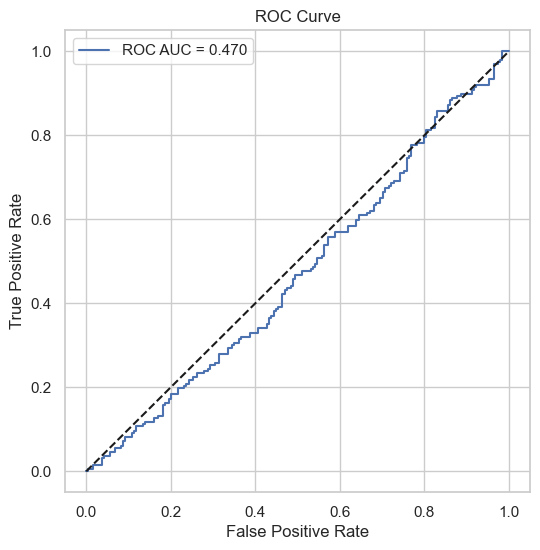

In [5]:
# ======================================
# ONE-SHOT PIPELINE TO BUILD df_final
# ======================================

import numpy as np
import pandas as pd
import yfinance as yf

# --------------------------------------
# 1. Download Data & Compute Returns
# --------------------------------------
df = yf.download("AAPL", start="2015-01-01", end="2023-01-01")

# Safe extraction of adjusted close
prices = df['Close'].dropna()

returns = prices.pct_change().dropna()

# --------------------------------------
# 2. Begin feature table
# --------------------------------------
df_feat = pd.DataFrame()
df_feat["price"] = prices
df_feat["return"] = returns

# --------------------------------------
# 3. Lag Features
# --------------------------------------
df_feat["lag1"] = df_feat["return"].shift(1)
df_feat["lag2"] = df_feat["return"].shift(2)
df_feat["lag5"] = df_feat["return"].shift(5)

# --------------------------------------
# 4. Rolling Means (local trend)
# --------------------------------------
df_feat["roll_mean_5"]  = df_feat["return"].rolling(5).mean()
df_feat["roll_mean_21"] = df_feat["return"].rolling(21).mean()

# --------------------------------------
# 5. Rolling Volatility (risk)
# --------------------------------------
df_feat["roll_vol_5"]  = df_feat["return"].rolling(5).std()
df_feat["roll_vol_21"] = df_feat["return"].rolling(21).std()

# --------------------------------------
# 6. Rolling High/Low (breakout features)
# --------------------------------------
df_feat["roll_max_20"] = df_feat["price"].rolling(20).max()
df_feat["roll_min_20"] = df_feat["price"].rolling(20).min()

# --------------------------------------
# 7. Momentum (multi-period returns)
# --------------------------------------
df_feat["mom_5"]  = df_feat["price"].pct_change(5)
df_feat["mom_21"] = df_feat["price"].pct_change(21)
df_feat["mom_63"] = df_feat["price"].pct_change(63)

# --------------------------------------
# 8. Realized Volatility (RV)
# --------------------------------------
df_feat["rv_21"] = np.sqrt((df_feat["return"]**2).rolling(21).sum() * 252)
df_feat["rv_63"] = np.sqrt((df_feat["return"]**2).rolling(63).sum() * 252)

# --------------------------------------
# 9. Technical Indicators (SMA, EMA)
# --------------------------------------
df_feat["sma_20"] = df_feat["price"].rolling(20).mean()
df_feat["sma_50"] = df_feat["price"].rolling(50).mean()

df_feat["ema_20"] = df_feat["price"].ewm(span=20, adjust=False).mean()
df_feat["ema_50"] = df_feat["price"].ewm(span=50, adjust=False).mean()

# --------------------------------------
# 10. RSI Indicator
# --------------------------------------
delta = df_feat["price"].diff()
up = delta.clip(lower=0)
down = -delta.clip(upper=0)

roll_up = up.rolling(14).mean()
roll_down = down.rolling(14).mean()

rs = roll_up / roll_down
df_feat["rsi_14"] = 100 - (100 / (1 + rs))

# --------------------------------------
# 11. Final cleaning
# --------------------------------------
df_final = df_feat.dropna()

# Show result
df_final.head(), df_final.shape

# Day13: Logistic Regression pipeline (binary up/down prediction)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# 1) Prepare data: target = 1 if next-day return > 0 else 0
df = df_final.copy()                    # df_final should already exist
df['target_up'] = (df['return'].shift(-1) > 0).astype(int)
df = df.dropna().copy()                 # drop last row after shift

# 2) Features & target
feature_cols = ["lag1","lag2","lag5",
                "roll_mean_5","roll_mean_21",
                "roll_vol_5","roll_vol_21",
                "mom_5","mom_21","mom_63"]

X = df[feature_cols]
y = df['target_up']

# 3) Time-aware train/test split (no shuffle)
test_size = 0.2
split_idx = int(len(X) * (1 - test_size))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 4) Scale features (fit on train only)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 5) Fit logistic regression with balanced class weights
# class_weight='balanced' adjusts for imbalance automatically
model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)
model.fit(X_train_s, y_train)

# 6) Predictions & probabilities
y_pred = model.predict(X_test_s)
y_proba = model.predict_proba(X_test_s)[:,1]   # probability of class 1 (Up)

# 7) Metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rocauc = roc_auc_score(y_test, y_proba)

print("Confusion matrix:\n", cm)
print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  ROC-AUC: {rocauc:.4f}")

# 8) Plot ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {rocauc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



In [6]:
split_idx = int(len(X) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]


In [7]:
# Decision tree with depth control to avoid overfitting
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:,1]  # probability of "up"


In [8]:
cm = confusion_matrix(y_test, y_pred_tree)
acc = accuracy_score(y_test, y_pred_tree)
prec = precision_score(y_test, y_pred_tree)
rec = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
auc = roc_auc_score(y_test, y_proba_tree)

print("Decision Tree Metrics:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")


Decision Tree Metrics:
[[ 64 130]
 [ 72 125]]
Accuracy: 0.4834, Precision: 0.4902, Recall: 0.6345, F1: 0.5531, AUC: 0.4899


In [9]:
rf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=6,          # limit depth to reduce overfitting
    min_samples_leaf=20,  
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]


In [10]:
cm = confusion_matrix(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Metrics:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")


Random Forest Metrics:
[[ 55 139]
 [ 56 141]]
Accuracy: 0.5013, Precision: 0.5036, Recall: 0.7157, F1: 0.5912, AUC: 0.4741


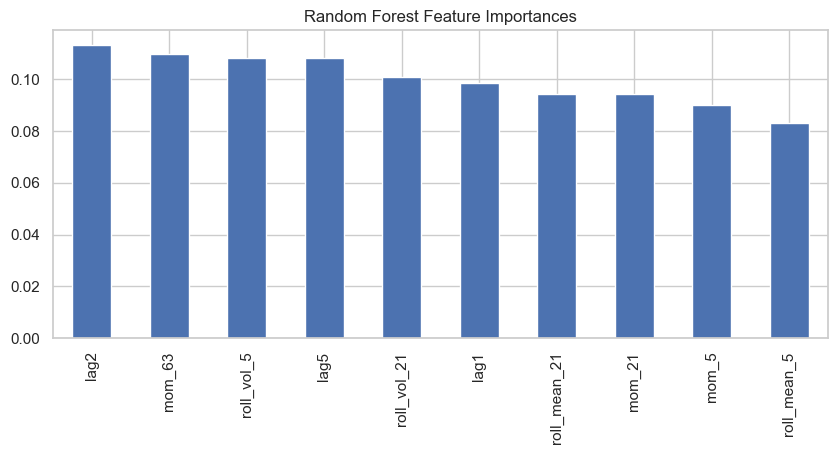

In [11]:
importances = pd.Series(rf.feature_importances_, index=feature_cols)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title("Random Forest Feature Importances")
plt.show()
